In [3]:
import tensorflow as tf
from sklearn.metrics import classification_report

In [2]:
#pip install tensorflow


     -------------------------------------- 266.3/266.3 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 4.5/4.5 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 10.5 MB/s eta 0:00:00
     --------------------------------------- 26.4/26.4 MB 10.1 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.5 MB/s eta 0:00:00
     ------------------------------------- 896.6/896.6 kB 11.4 MB/s eta 0:00:00
     ------------------------------------- 233.6/233.6

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
# Reshape the data to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
# Normalize the pixel values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
# Define the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [8]:
# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2163 - accuracy: 0.9349
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0889 - accuracy: 0.9731
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0605 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0474 - accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0372 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0294 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0265 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0231 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0203 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 32s 17m

In [9]:
# Evaluate the model on the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0712 - accuracy: 0.9840


[0.0712461918592453, 0.984000027179718]

In [10]:
# Generate predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)


313/313 [==============================] - 2s 5ms/step


In [11]:
# Generate and print the classification report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.96      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



1/1 [==============================] - 0s 26ms/step
Predicted label: 6


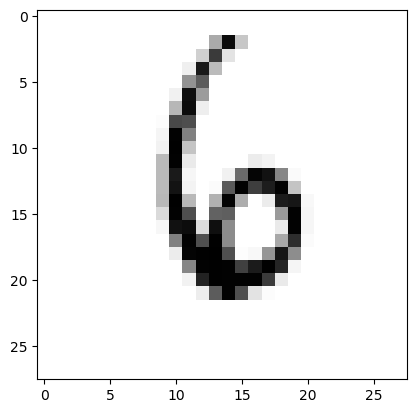

In [12]:
# Visualize a test image and its prediction
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted label:", pred.argmax())